### Decision Tree Classifier in Sklearn


In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import pydotplus
from IPython.display import Image  

C:\Users\ShaikJ\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
data = pd.read_csv('TelcoChurn.csv')

---
Check the data types and if there are any missing values.  

In [3]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

---
Since this will transform the dataframe; I'm going to copy it. 

* customer ID doesn't appear to provide much value so it will be dropped.  
* TotalCharges should be numeric, but is coming in as an object.

In [5]:
x = data.drop(['customerID'], axis=1)

In [6]:
x['TotalCharges'] = pd.to_numeric(x['TotalCharges'], errors='coerce')

In [7]:
x['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [8]:
x.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

---
Apparently the to_numeric method created some nan's...this isn't good.  To get around it for now, the mean will take their place.

In [9]:
x['TotalCharges'].isnull().sum()

11

In [10]:
x['TotalCharges'] = x['TotalCharges'].fillna(x['TotalCharges'].mean())

In [11]:
x.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

----
Before dropping the target from the dataframe, copy it to another variable. After the target is dropped, dummy variables will be created as well as a list of feature names to be used to label the decision tree.

In [12]:
def score_to_numeric(x):
    if x=='No':
        return 1
    if x=='Yes':
        return 2
    
x['Churn_num'] = x['Churn'].apply(score_to_numeric)
x
y = x['Churn_num'].values

In [13]:
y = x['Churn_num'].values
x = x.drop(['Churn','Churn_num'], axis=1)
x = pd.get_dummies(x)

In [14]:
feature_names = []
for col in x.columns:
    feature_names.append(col)

---
Getting close to the fun stuff... train_test_split makes it easy to create a training set and a test set.  

In [15]:
seed = 7
test_size = 0.33
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)

---
DecisionTreeClassifier [docs](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier). 

In [16]:
dTree = DecisionTreeClassifier(max_depth=3, class_weight='balanced')

In [17]:
dTree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [18]:
seed = 7
test_size = 0.33
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)

In [19]:
dTree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [20]:
dTree.score(x_train, y_train)

0.7390843577787198

In [21]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

print("Metrics on Training Data")
lrtrain_predict = dTree.predict(x_train)
print(metrics.accuracy_score(y_train, lrtrain_predict))
print(confusion_matrix(y_train, lrtrain_predict))

print("------------------------------")
print("------------------------------")


print("Metrics on Test Data")
lrtest_pred = dTree.predict(x_test)
print(metrics.accuracy_score(y_test, lrtest_pred))
print(confusion_matrix(y_test,lrtest_pred))

Metrics on Training Data
0.7390843577787198
[[2544  944]
 [ 287  943]]
------------------------------
------------------------------
Metrics on Test Data
0.7303225806451613
[[1222  464]
 [ 163  476]]


In [22]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100,max_depth=5).fit(x_train, y_train)
print (rfc)
importances = list(zip(rfc.feature_importances_, x.columns))
importances.sort(reverse=False)
pd.DataFrame(importances,columns=['Coeff','Features'],index=[x for (_,x) in importances]).plot(kind = 'barh', color = 'purple',figsize=(9,7))


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [23]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

print("Metrics on Training Data")
lrtrain_predict = rfc.predict(x_train)
print(metrics.accuracy_score(y_train, lrtrain_predict))
print(confusion_matrix(y_train, lrtrain_predict))

print("------------------------------")
print("------------------------------")


print("Metrics on Test Data")
lrtest_pred = rfc.predict(x_test)
print(metrics.accuracy_score(y_test, lrtest_pred))
print(confusion_matrix(y_test,lrtest_pred))

Metrics on Training Data
0.8039423484527342
[[3250  238]
 [ 687  543]]
------------------------------
------------------------------
Metrics on Test Data
0.8012903225806451
[[1576  110]
 [ 352  287]]


In [24]:
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, roc_auc_score
from sklearn.metrics import cohen_kappa_score

#gives model report in dataframe
def model_report(model,training_x,testing_x,training_y,testing_y,name) :
    model.fit(training_x,training_y)
    predictions  = model.predict(testing_x)
    accuracy     = accuracy_score(testing_y,predictions)
    recallscore  = recall_score(testing_y,lrtest_pred)
    precision    = precision_score(testing_y,lrtest_pred)
    roc_auc      = roc_auc_score(testing_y,lrtest_pred)
    f1score      = f1_score(testing_y,lrtest_pred) 
    kappa_metric = cohen_kappa_score(testing_y,lrtest_pred)
    
    df = pd.DataFrame({"Model"           : [name],
                       "Accuracy_score"  : [accuracy],
                       "Recall_score"    : [recallscore],
                       "Precision"       : [precision],
                       "f1_score"        : [f1score],
                       "Area_under_curve": [roc_auc],
                       "Kappa_metric"    : [kappa_metric],
                      })
    return df

#outputs for every model

model1 = model_report(dTree,x_train, x_test, y_train, y_test,
                      "Decision Tree")

model2 = model_report(rfc,x_train, x_test, y_train, y_test,
                      "Random Forest Classifier")

#concat all models
model_performances = pd.concat([model1,model2],axis = 0).reset_index()
model_performances = model_performances.drop(columns = "index",axis =1)
model_performances

,Model,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curve,Kappa_metric
0,Decision Tree,0.730323,0.934757,0.817427,0.872164,0.691948,0.435055
1,Random Forest Classifier,0.798710,0.934757,0.817427,0.872164,0.691948,0.435055


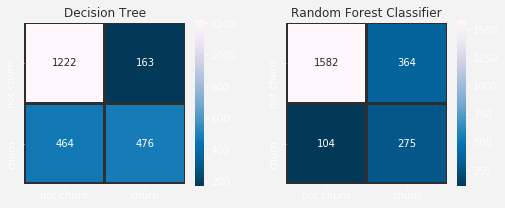

In [32]:
lst    = [dTree,rfc]

length = len(lst)

mods   = ['Decision Tree','Random Forest Classifier']

fig = plt.figure(figsize=(13,15))
fig.set_facecolor("#F3F3F3")
for i,j,k in itertools.zip_longest(lst,range(length),mods) :
    plt.subplot(4,3,j+1)
    predictions = i.predict(x_test)
    conf_matrix = confusion_matrix(predictions,y_test)
    sns.heatmap(conf_matrix,annot=True,fmt = "d",square = True,
                xticklabels=["not churn","churn"],
                yticklabels=["not churn","churn"],
                linewidths = 2,linecolor = "#2e2e2e",cmap = "PuBu_r")
    plt.title(k,color = "#2e2e2e")
    plt.subplots_adjust(wspace = .3,hspace = .3)

In [33]:
import itertools
import seaborn as sns

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges): #plt.cm.Oranges
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = (100*cm.astype('float')) / cm.sum(axis=1)[:, np.newaxis]
        fmt = '.2f'
        thresh = cm.max() / 2.
    return (cm)


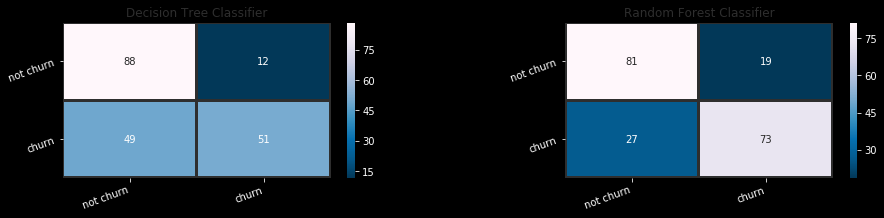

In [35]:
lst    = [dTree,rfc]

length = len(lst)

mods   = ['Decision Tree Classifier','Random Forest Classifier']

fig = plt.figure(figsize=(15,20))

for i,j,k in itertools.zip_longest(lst,range(length), mods) :
    plt.subplot(5,2,j+1)
    predictions = i.predict(x_test)
    conf_matrix = confusion_matrix(predictions, y_test)
    dec_matrix = plot_confusion_matrix(conf_matrix, classes=['', ''], normalize=True, title='Confusion Matrix')
    sns.heatmap(dec_matrix, annot=True,
                xticklabels=["not churn","churn"],
                yticklabels=["not churn","churn"],
                linewidths = 2, linecolor = "#2e2e2e",cmap = "PuBu_r")
    plt.subplots_adjust(wspace = .5,hspace = .5)
    plt.xticks(rotation=20, ha="right")
    plt.yticks(rotation=20, ha="right")
    plt.title(k,color = "#2e2e2e")
    